In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# Load The Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [3]:
df.drop(["CustomerId","Surname"],axis='columns',inplace=True)

In [4]:
df.sample(10)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6289,6290,633,Spain,Male,63,4,114552.60,1,1,0,73856.28,1
2424,2425,573,France,Male,31,2,0.00,2,1,1,91957.39,0
5016,5017,501,France,Female,29,8,0.00,2,1,0,112664.24,0
8666,8667,687,Germany,Male,35,1,125141.24,2,1,1,148537.07,0
6623,6624,581,France,Male,28,3,104367.50,1,1,1,29937.75,0
5903,5904,570,France,Female,29,4,153040.03,1,1,1,131363.57,1
1064,1065,723,France,Female,20,4,0.00,2,1,1,140385.33,0
4819,4820,613,France,Male,26,4,100446.57,1,0,1,149653.81,0
4635,4636,619,France,Female,33,2,167733.51,2,1,1,65222.48,0
1513,1514,440,France,Male,42,2,0.00,2,1,0,49826.68,0


In [5]:
df.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
def find_nulls(df): #find null values
    null_values = df.isnull().sum()
    return null_values
    
find_nulls(df)

RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

# Data Visualization

In [9]:
t_churn_yes = df[df.Exited == 1].Tenure
t_churn_no = df[df.Exited == 0].Tenure


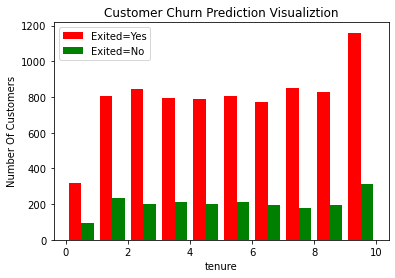

In [10]:
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([t_churn_no,t_churn_yes],color=['red','green'],label=['Exited=Yes','Exited=No'])
plt.legend()


In [11]:
def print_unique_columns(df):
    for column in df.columns:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [12]:
print_unique_columns(df)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


# One hot encoding

In [13]:
df.columns = df.columns.str.strip() #remove spaces
df = pd.get_dummies(data=df, columns=['Geography','Gender'])
df.columns

Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [14]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [15]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [16]:
for columns in df:
    print(f'{columns}{df[columns].unique()}')

RowNumber[    1     2     3 ...  9998  9999 10000]
CreditScore[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.5

In [17]:
df.drop(["RowNumber"],axis='columns',inplace=True)

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


# Train test split

In [19]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [20]:

X_train.shape

(8000, 13)

In [21]:

X_test.shape

(2000, 13)

In [22]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Model Training and Experimentation

In [ ]:
!pip install mlflow

In [34]:
import mlflow
import mlflow.sklearn
import mlflow.tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


### Deep Learning Model

In [35]:
def build_deep_learning_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_deep_learning_model():
    model = build_deep_learning_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    return model



### XGBoost Model

In [ ]:
!pip install xgboost
import xgboost as xgb
def train_xgboost():
    model = xgb.XGBClassifier(use_label_encoder=False)
    model.fit(X_train, y_train)
    return model

### Random Forest Model

In [27]:
def train_random_forest():
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

### Train and evaluate models using MLflow

In [36]:
def log_model_experiment(model_name, model, X_test, y_test):
    with mlflow.start_run():
        y_pred = model.predict(X_test)
        
        y_pred_proba = model.predict(X_test)
        
        if model_name == 'Deep Learning':
            y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)
        else:
            y_pred = y_pred_proba
            
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        
        print(f'{model_name} Accuracy: {accuracy}')
        print(f'{model_name} Precision: {precision}')
        print(f'{model_name} Recall: {recall}')
        print(f'{model_name} F1-Score: {f1}')
            
       
        print(f'{model_name} Accuracy: {accuracy}')
        
        if model_name == 'Deep Learning':
            mlflow.tensorflow.log_model(model, "model")
        elif model_name == 'Random Forest':
            mlflow.sklearn.log_model(model, "model")
        else:
            mlflow.xgboost.log_model(model, "model")
        
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        

## Train and log all models

In [37]:
deep_learning_model = train_deep_learning_model()
log_model_experiment("Deep Learning", deep_learning_model, X_test, y_test)

random_forest_model = train_random_forest()
log_model_experiment("Random Forest", random_forest_model, X_test, y_test)

xgboost_model = train_xgboost()
log_model_experiment("XGBoost", xgboost_model, X_test, y_test)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4999 - accuracy: 0.7814 - val_loss: 0.4517 - val_accuracy: 0.8100
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8000 - val_loss: 0.4368 - val_accuracy: 0.8306
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.8116 - val_loss: 0.4204 - val_accuracy: 0.8313
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8188 - val_loss: 0.3984 - val_accuracy: 0.8269
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8277 - val_loss: 0.3718 - val_accuracy: 0.8438
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8392 - val_loss: 0.3651 - val_accuracy: 0.8512
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8427 - val_loss: 0.3415 - val_accuracy: 0.8569
Epoch 

2024/09/09 21:55:42 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Deep Learning Accuracy: 0.8505
Deep Learning Precision: 0.7022900763358778
Deep Learning Recall: 0.454320987654321
Deep Learning F1-Score: 0.5517241379310345
Deep Learning Accuracy: 0.8505
INFO:tensorflow:Assets written to: C:\Users\DAMIND~1\AppData\Local\Temp\tmpgw0h6si8\model\data\model\assets


2024/09/09 21:55:56 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\DAMIND~1\AppData\Local\Temp\tmpgw0h6si8\model, flavor: tensorflow). Fall back to return ['tensorflow==2.7.0']. Set logging level to DEBUG to see the full traceback. 
2024/09/09 21:55:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Accuracy: 0.8575
Random Forest Precision: 0.74
Random Forest Recall: 0.4567901234567901
Random Forest F1-Score: 0.5648854961832062
Random Forest Accuracy: 0.8575


2024/09/09 21:56:04 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\DAMIND~1\AppData\Local\Temp\tmppmy20uhi\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.4.1.post1', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2024/09/09 21:56:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost Accuracy: 0.8535
XGBoost Precision: 0.7058823529411765
XGBoost Recall: 0.4740740740740741
XGBoost F1-Score: 0.5672082717872969
XGBoost Accuracy: 0.8535


C:\Users\damindu pahasara\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [21:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2024/09/09 21:56:10 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\DAMIND~1\AppData\Local\Temp\tmp3jhktj0a\model, flavor: xgboost). Fall back to return ['xgboost==2.0.3']. Set logging level to DEBUG to see the full traceback. 
2024/09/09 21:56:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
